<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/03_KerasTuner_For_Hyperparameter_Tunning/03_KerasTuner_for_Air_Quality_Index_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Keras-Tuner : HyperParameter Tunning for Regression Problem</b></h1>
<h2><b>Regression Analysis For Air Quality Index </b></h2>

In [2]:
#!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 6.8MB/s 


**Keras Tuner--> it decides number of Hidden Layers and neuron in Neural Network**


<h1><b>Step 1 Load Libraries</b></h1>


In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch

<h1><b>Step 2 Load data</b></h1>

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Keras-Tuner/main/Real_Combine.csv')
df = df[df["PM 2.5"].isnull()!=True]

In [37]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<b>Seprate Features and Target from data</b>

In [38]:
Features = df.iloc[:, :8]  # OR df.iloc[:, :-1]    # Independent features

Target = df.iloc[:,-1]                             # Dependent features
#Target.head()

In [39]:
Features.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [40]:
Target.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

<h1><b>Step 3 keras tuner : hyper parameter tunning</b></h1>

**Hyperparameters**
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layer?
3. what should be the Learning Rate

In [41]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' +str(i), min_value=32, max_value=512, step=32), activation='relu',kernel_initializer='he_uniform'))
    model.add(layers.Dense(units=1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam( hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model    

<h2><b>Randomsearch algorithm is used to find best hyperparameters</b></h2>

In [53]:
tuner = RandomSearch(
                      build_model,
                      objective='val_mean_absolute_error',
                      max_trials=5,
                      executions_per_trial=3,
                      directory='project_2',
                      project_name='Air Quality Index')

In [54]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


<h1><b>Step 4 prepare train test data</b></h1>

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=0)

In [56]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 37s]
val_mean_absolute_error: 47.623130798339844

Best val_mean_absolute_error So Far: 44.68807729085287
Total elapsed time: 00h 07m 03s
INFO:tensorflow:Oracle triggered exit


In [57]:
tuner.results_summary()

Results summary
Results in project_2/Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 17
units_0: 320
units_1: 32
learning_rate: 0.0001
units_2: 384
units_3: 256
units_4: 256
units_5: 384
units_6: 320
units_7: 416
units_8: 320
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 44.68807729085287
Trial summary
Hyperparameters:
num_layers: 12
units_0: 416
units_1: 320
learning_rate: 0.001
units_2: 288
units_3: 224
units_4: 256
units_5: 288
units_6: 96
units_7: 96
units_8: 192
units_9: 384
units_10: 160
units_11: 352
units_12: 416
units_13: 224
units_14: 64
units_15: 416
units_16: 448
Score: 45.64423370361328
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 448
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 45.76860046386719
Trial summary
Hyperparameters:
nu

<h1><b> prepare best model from above result</b></h1> 

In [66]:
from keras.layers import Dense

In [112]:
regressor = keras.Sequential()

In [113]:
regressor.add(Dense(units=64,activation="relu",kernel_initializer="he_uniform",input_dim=8))
regressor.add(Dense(units=480,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=64,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=416,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=256,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=480,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=448,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=288,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=352,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=160,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=288,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=320,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=128,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=480,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=160,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=128,activation="relu",kernel_initializer="he_uniform"))
regressor.add(Dense(units=128,activation="relu",kernel_initializer="he_uniform"))

regressor.add(Dense(units=1,activation="linear"))
regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_absolute_error',metrics=['mean_absolute_error'])


In [114]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_65 (Dense)             (None, 480)               31200     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                30784     
_________________________________________________________________
dense_67 (Dense)             (None, 416)               27040     
_________________________________________________________________
dense_68 (Dense)             (None, 256)               106752    
_________________________________________________________________
dense_69 (Dense)             (None, 480)               123360    
_________________________________________________________________
dense_70 (Dense)             (None, 448)              

In [115]:
regressor_hist = regressor.fit(x_train,y_train,validation_split=0.2,epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 30ms/step - loss: 269.5526 - mean_absolute_error: 269.5526 - val_loss: 67.5616 - val_mean_absolute_error: 67.5616
Epoch 2/20
22/22 [==============================] - 0s 19ms/step - loss: 82.4940 - mean_absolute_error: 82.4940 - val_loss: 63.4326 - val_mean_absolute_error: 63.4326
Epoch 3/20
22/22 [==============================] - 0s 20ms/step - loss: 67.0971 - mean_absolute_error: 67.0971 - val_loss: 63.5472 - val_mean_absolute_error: 63.5472
Epoch 4/20
22/22 [==============================] - 0s 18ms/step - loss: 65.8107 - mean_absolute_error: 65.8107 - val_loss: 74.7935 - val_mean_absolute_error: 74.7935
Epoch 5/20
22/22 [==============================] - 0s 19ms/step - loss: 72.7912 - mean_absolute_error: 72.7912 - val_loss: 61.5427 - val_mean_absolute_error: 61.5427
Epoch 6/20
22/22 [==============================] - 0s 18ms/step - loss: 64.2268 - mean_absolute_error: 64.2268 - val_loss: 60.1435 - val_mean_absolute_error: 60.1

In [116]:
regressor_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [117]:
y_pred = regressor.predict(x_test)

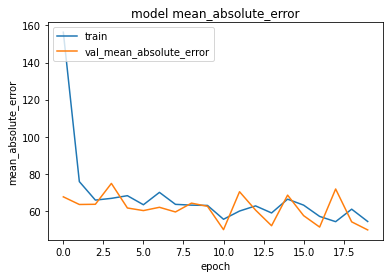

In [118]:
import matplotlib.pyplot as plt
plt.plot(regressor_hist.history["mean_absolute_error"])
plt.plot(regressor_hist.history["val_mean_absolute_error"])
plt.title("model mean_absolute_error")
plt.ylabel("mean_absolute_error")
plt.xlabel("epoch")
plt.legend(["train","val_mean_absolute_error"],loc="upper left")
plt.show()